In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pickle
from cryodrgn import analysis
from cryodrgn import utils

In [8]:
WORKDIR = '/nfs/bartesaghilab2/ds672/empiar10076/2023_10_30_output_tutorial_downsampling_256_z_8' 
EPOCH = 49 

In [9]:
with open(f'{WORKDIR}/analyze.{EPOCH}/umap.pkl', 'rb') as archivo:
    umap_emb = pickle.load(archivo)

print(umap_emb)

[[-0.02279027 -2.3690386 ]
 [-3.0926023   6.381845  ]
 [-2.056392    2.9468062 ]
 ...
 [ 3.118272    0.373669  ]
 [ 3.6112537   0.8157695 ]
 [ 5.5148816   2.8889358 ]]


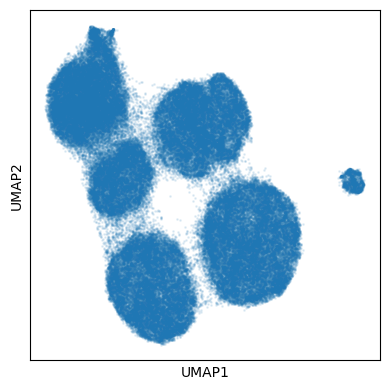

In [10]:
plt.figure(figsize=(4, 4))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], alpha=0.1, s=1, rasterized=True)
#plt.scatter(centers[:,0], centers[:,1], c=colors,edgecolor='black')
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()

In [11]:
outdir = '/hpc/home/ds672/master/aux_functions/'
# kmeans clustering
# logger.info("K-means clustering...")
K = 5
kmeans_labels, centers_umap = analysis.cluster_kmeans(umap_emb, K, reorder=False)
centers, centers_ind = analysis.get_nearest_point(umap_emb, centers_umap)
if not os.path.exists(f"{outdir}/kmeans{K}_umap"):
    os.mkdir(f"{outdir}/kmeans{K}_umap")
utils.save_pkl(kmeans_labels, f"{outdir}/kmeans{K}_umap/labels_umap.pkl")
np.savetxt(f"{outdir}/kmeans{K}_umap/centers.txt", centers)
np.savetxt(f"{outdir}/kmeans{K}_umap/centers_ind.txt", centers_ind, fmt="%d")
# logger.info("Generating volumes...")
vg.gen_volumes(f"{outdir}/kmeans{K}", centers)

/hpc/home/ds672/miniconda3/envs/cryodrgn/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(WARNING) (utils.py) (03-Nov-23 15:14:39) Warning: /hpc/home/ds672/master/aux_functions//kmeans5_umap/labels_umap.pkl already exists. Overwriting.


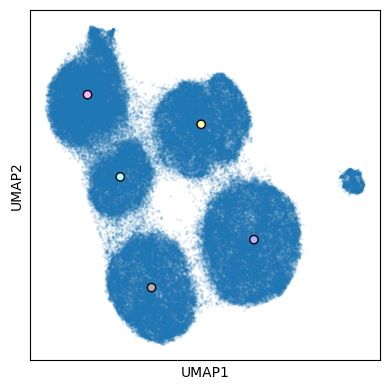

In [13]:
colors = analysis._get_chimerax_colors(K)

plt.figure(figsize=(4, 4))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], alpha=0.1, s=1, rasterized=True)
plt.scatter(centers[:,0], centers[:,1], c=colors,edgecolor='black')
plt.xticks([])
plt.yticks([])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()

In [14]:
zfile = f"{WORKDIR}/z.{EPOCH}.pkl"
weights = f"{WORKDIR}/weights.{EPOCH}.pkl"
cfg = (
    f"{WORKDIR}/config.yaml"
    if os.path.exists(f"{WORKDIR}/config.yaml")
    else f"{WORKDIR}/config.pkl"
)
vol_args = dict(
    Apix=3.275,
    downsample=args.downsample,
    flip=True,
    device=args.device,
    invert=args.invert,
    vol_start_index=args.vol_start_index,
)
vg = VolumeGenerator(weights, cfg, vol_args, skip_vol=args.skip_vol)

vg.gen_volumes(f"{outdir}/kmeans{K}", centers)

NameError: name 'vg' is not defined

In [17]:
print(centers.shape)
print(centers_ind.shape)

(5, 2)
(5,)
